# Prediction on Animal Species

## Summary:
The dataset we will be using is the Zoo (1990) provided by UC Irvine Machine Learning Repository. It stores data about 7 class animals and related attributes inlcuding animal name, hair, feathers etc are contained. In this project, we will use classification to classify a given animal to the most likely class.
## Introduction:
bg: 
qs: How can classification be used in predicting animal species?
description of the dateset: The zoo dataset contains 1 categorical attribute, 17 Boolean-valued attributes and 1 numerical attribute. The categorical attribute appears to be the class attribute. Detailed breakdowns are as follows: 
1. animal name: Unique for each instance 
2. hair: Boolean 
3. feathers: Boolean 
4. eggs: Boolean 
5. milk: Boolean 
6. airborne: Boolean 
7. aquatic: Boolean 
8. predator: Boolean 
9. toothed: Boolean 
10. backbone: Boolean 
11. breathes: Boolean 
12. venomous: Boolean 
13. fins: Boolean 
14. legs: Numeric (set of values: {0,2,4,5,6,8}) 
15. tail: Boolean 
16. domestic: Boolean 
17. catsize: Boolean 
18. type: Numeric (integer values in range [1,7])

## Methods & Results


In [11]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#reading the data as a csv from the uci web server, with header = false as the data contains no header
zoo_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", header = None)
#Adding column names to the data
colm = [ "animalName", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type" ]
#Adding the columns to our zoo_data dataframe
zoo_data.columns = colm

In [3]:
zoo_data

,animalName,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
#saving the data as a csv file in our data directory
zoo_data.to_csv(r'./data/zoo.csv')

In [15]:
print("Whether the dataset contains missing value: " + str(zoo_data.isna().any().any()))

Whether the dataset contains missing value: False


In [16]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


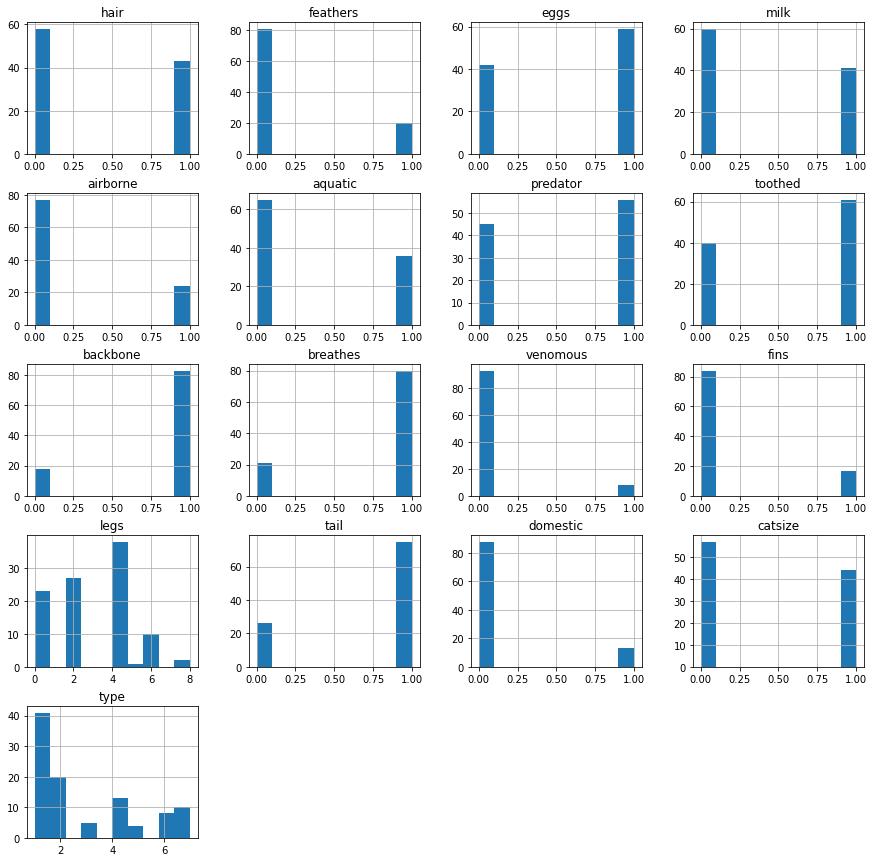

In [17]:
zoo_data.hist(figsize=(15,15),);